<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
### Type your code here

tr_mcc_codes = pd.read_csv('C:/Users/cated/OneDrive/Документы/transact/tr_mcc_codes.csv', sep=';', encoding = 'utf-8')
tr_types = pd.read_csv('C:/Users/cated/OneDrive/Документы/transact/tr_types.csv', sep=';', encoding = 'utf-8')
transactions = pd.read_csv('C:/Users/cated/OneDrive/Документы/transact/transactions.csv', sep=',', nrows=1000000, encoding = 'utf-8')
customers_gender_train = pd.read_csv('C:/Users/cated/OneDrive/Документы/transact/gender_train.csv', sep=',', encoding = 'utf-8')

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [3]:
### Type your code here

# Выведем информацию о столбцах transactions, чтобы убедиться в наличии столбца 'mcc_code'
#print(transactions.columns)

# Соединение с tr_mcc_codes и удаление дубликатов
tran = pd.merge(transactions, tr_mcc_codes, how='inner', on='mcc_code')

# Выведем количество строк после каждого этапа
print("После соединения с  transactions и tr_mcc_codes :", tran.shape[0])

# Соединение с tr_types и удаление дубликатов
tran1 = pd.merge(tran, tr_types, how='inner', on='tr_type')

# Выведем количество строк после каждого этапа
print("После соединения с transactions и tr_types:", tran1.shape[0])

# Соединение с customers_gender_train через left join (если у вас есть customers_gender_train)
tran2 = pd.merge(tran1, customers_gender_train, how='left', on='customer_id')

print("После соединения с transactions и customers_gender_train:", tran2.shape[0])



# Проверка, что количество строк равно 999584
assert tran2.shape[0] == 999584

# Вывод результата
print("Результат соединения:")
print(tran2.head())
print(tran2.columns)
global tran2

После соединения с  transactions и tr_mcc_codes : 1000000
После соединения с transactions и tr_types: 999584
После соединения с transactions и customers_gender_train: 999584
Результат соединения:
   customer_id  tr_datetime  mcc_code  tr_type   amount term_id  \
0     39026145   0 10:23:26      4814     1030 -2245.92     NaN   
1     39026145   6 07:08:31      4814     1030 -5614.79     NaN   
2     39026145   8 07:06:10      4814     1030 -1122.96     NaN   
3     39026145  11 08:49:03      4814     1030 -2245.92     NaN   
4     39026145  11 14:12:08      4814     1030 -2245.92     NaN   

                                     mcc_description  \
0  Звонки с использованием телефонов, считывающих...   
1  Звонки с использованием телефонов, считывающих...   
2  Звонки с использованием телефонов, считывающих...   
3  Звонки с использованием телефонов, считывающих...   
4  Звонки с использованием телефонов, считывающих...   

                   tr_description  gender  
0  Оплата услуги. Ба

#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [5]:
tran2.groupby(['gender'])['amount'].mean()


gender
0.0   -21340.394327
1.0   -23973.418753
Name: amount, dtype: float64

In [6]:
### print(tran2.head())
tran2.groupby(['gender'])['amount'].mean()

male_data = tran2[tran2['gender'] == 1.0]

female_data = tran2[tran2['gender'] == 0.0]

# Вычисление средних трат для мужчин и женщин
average_amount_male = male_data['amount'].mean()
average_amount_female = female_data['amount'].mean()

# Вычисление модуля разницы
difference = abs(average_amount_male - average_amount_female)

# Вывод результата с округлением до двух знаков после запятой
result = '{:.2f}'.format(difference)
print(result)

2633.02


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [26]:
### Type your code here


# Создание нового столбца mcc_code+tr_type
tran2['mcc_tr_type'] = tran2['mcc_code'].astype(str) + tran2['tr_type'].astype(str)

# Фильтрация данных по отрицательным значениям amount
negative_amount_data = tran2[tran2['amount'] < 0]

# Группировка по mcc_tr_type и вычисление дисперсии и количества наблюдений
result = negative_amount_data.groupby('mcc_tr_type')['amount'].agg(['var', 'count'])

# Фильтрация по количеству наблюдений >= 10
result = result[result['count'] >= 10]

# Вычисление отношения максимальной дисперсии к минимальной
ratio = result['var'].max() / result['var'].min()

# Вывод результата без дробной части и округленного до ближайшего целого
result_integer = round(ratio)
print(result_integer)

9170599


#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [29]:
### Type your code here

# Рассчитываем максимальные суммы приходов для каждого типа транзакции и пола
max_income_data = tran2[tran2['amount'] > 0].groupby(['tr_description', 'gender'])['amount'].max().reset_index()

# Сортируем данные по убыванию и выбираем по 5 минимальных для каждого пола
top_5_min_male = max_income_data[max_income_data['gender'] == 1.0].nlargest(5, 'amount')
top_5_min_female = max_income_data[max_income_data['gender'] == 0.0].nlargest(5, 'amount')

# Выделяем транзакции, которые встречаются одновременно у мужчин и женщин
common_transactions = pd.merge(top_5_min_male, top_5_min_female, on='tr_description', how='inner')

# Форматированный вывод результатов
print("\nТоп 5 минимальных сумм приходов у мужчин:")
print(top_5_min_male[['tr_description', 'amount']].to_string(index=False))

print("\n\nТоп 5 минимальных сумм приходов у женщин:")
print(top_5_min_female[['tr_description', 'amount']].to_string(index=False))

print("\n\nТранзакции, которые встречаются у мужчин и у женщин:")
print(common_transactions[['tr_description', 'amount_x', 'amount_y']].to_string(index=False))


Топ 5 минимальных сумм приходов у мужчин:
                                                                       tr_description       amount
Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя) 145984525.17
                                                             Взнос наличных через POS  21336199.83
 Перевод на карту (с карты) через Мобильный банк (с взиманием комиссии с отправителя)  11117283.07
                                         Взнос наличных через АТМ (в своем тер.банке)   9769733.61
                          Взнос наличных через POS (в своем ТБ) по счету в овердрафте   9657437.82


Топ 5 минимальных сумм приходов у женщин:
                                                                       tr_description      amount
Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя) 67377473.16
                                                             Взнос наличных через POS 22459157.72
 Перевод на карту (с карт

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [50]:
# (\*) Выделение относительного дня
tran2['tr_day'] = tran2['tr_datetime'].str.split().str[0]

# (\**) Отфильтровать строки с количеством уникальных mcc_description больше 75 в относительный день
filtered_transactions = tran2.groupby('tr_day')['mcc_description'].nunique()
filtered_transactions = filtered_transactions[filtered_transactions > 75].index
filtered_df = tran2[tran2['tr_day'].isin(filtered_transactions)]

# (\***) Группировка по mcc_description и полу (gender)
grouped_df = filtered_df.groupby(['mcc_description', 'gender'])

# Анализ результатов группировки


# 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин

median_floristics_male = filtered_df[(filtered_df['gender'] == 1) & (filtered_df['mcc_description'] == 'Флористика')]['amount'].median()
median_floristics_female = filtered_df[(filtered_df['gender'] == 0) & (filtered_df['mcc_description'] == 'Флористика')]['amount'].median()
median_floristics_diff = median_floristics_male - median_floristics_female

print("\nМедианы для 'Флористика':")
print(f"Женщины: {median_floristics_female}")
print(f"Мужчины: {median_floristics_male}")

print(f"\n3) Абсолютное значение медианы с типом 'Флористика' у мужчин выше той же медианы у женщин: {median_floristics_diff}")

# 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
female_securities = filtered_df[(filtered_df['gender'] == 0) & (filtered_df['mcc_description'] == 'Ценные бумаги')]
male_securities = filtered_df[(filtered_df['gender'] == 1) & (filtered_df['mcc_description'] == 'Ценные бумаги')]

print("\nМедианы для 'Ценные бумаги':")
print(f"Женщины: {female_securities['amount'].median()}")
print(f"Мужчины: {male_securities['amount'].median()}")

if not female_securities.empty and not male_securities.empty:
    median_securities_female = female_securities['amount'].median()
    median_securities_male = male_securities['amount'].median()
    median_securities_diff = median_securities_female - median_securities_male
    print(f"\n4) Абсолютное значение медианы женских трат на 'Ценные бумаги' выше мужских: {median_securities_diff}")
else:
    print("\n4) Недостаточно данных для вычисления медианы по 'Ценные бумаги' для обоих полов.")

# 5) Абсолютное значение медианы женских трат в 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны' ниже мужских
female_bars = filtered_df[(filtered_df['gender'] == 0) & (filtered_df['mcc_description'] == 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны')]
male_bars = filtered_df[(filtered_df['gender'] == 1) & (filtered_df['mcc_description'] == 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны')]

print("\nМедианы для 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны':")
print(f"Женщины: {female_bars['amount'].median()}")
print(f"Мужчины: {male_bars['amount'].median()}")

if not female_bars.empty and not male_bars.empty:
    median_bars_female = female_bars['amount'].median()
    median_bars_male = male_bars['amount'].median()
    median_bars_diff = median_bars_female - median_bars_male
    print(f"\n5) Абсолютное значение медианы женских трат в 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны' ниже мужских: {median_bars_diff}")
else:
    print("\n5) Недостаточно данных для вычисления медианы по 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны' для обоих полов.")



Медианы для 'Флористика':
Женщины: -13890.99
Мужчины: -18865.69

3) Абсолютное значение медианы с типом 'Флористика' у мужчин выше той же медианы у женщин: -4974.699999999999

Медианы для 'Ценные бумаги':
Женщины: nan
Мужчины: nan

4) Недостаточно данных для вычисления медианы по 'Ценные бумаги' для обоих полов.

Медианы для 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны':
Женщины: nan
Мужчины: nan

5) Недостаточно данных для вычисления медианы по 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны' для обоих полов.


In [7]:
# (\*) Выделение относительного дня
tran2['tr_day'] = tran2['tr_datetime'].str.split().str[0]

# (\**) Отфильтровать строки с количеством уникальных mcc_description больше 75 в относительный день
filtered_transactions = tran2.groupby('tr_day')['mcc_description'].nunique()
filtered_transactions = filtered_transactions[filtered_transactions > 75].index
filtered_df = tran2[tran2['tr_day'].isin(filtered_transactions)]

# (\***) Группировка по mcc_description и полу (gender)
grouped_df = filtered_df.groupby(['mcc_description', 'gender'])


female_securities = filtered_df[(filtered_df['gender'] == 0) & (filtered_df['mcc_description'] == 'Ценные бумаги')]
male_securities = filtered_df[(filtered_df['gender'] == 1) & (filtered_df['mcc_description'] == 'Ценные бумаги')]
female_securities.head()

female_securities2 = filtered_df[(filtered_df['gender'] == 0) ]
female_securities2.head(100)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,tr_day
417,5524414,14 09:32:42,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0.0,14
420,5524414,65 12:43:36,4814,1030,-3368.87,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0.0,65
421,5524414,70 09:32:13,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0.0,70
423,5524414,84 06:24:29,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0.0,84
428,5524414,145 11:04:24,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0.0,145
...,...,...,...,...,...,...,...,...,...,...
609,3765322,270 14:01:17,4814,1030,-33688.74,888991,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0.0,270
616,3765322,353 13:34:37,4814,1030,-2245.92,888919,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0.0,353
617,3765322,360 11:37:19,4814,1030,-44918.32,888914,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0.0,360
618,3765322,360 11:38:36,4814,1030,-22459.16,888912,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0.0,360


In [28]:
# (\*) Выделение относительного дня
tran2['tr_day'] = tran2['tr_datetime'].str.split().str[0]

# (\**) Отфильтровать строки с количеством уникальных mcc_description больше 75 в относительный день
filtered_transactions = tran2.groupby('tr_day')['mcc_description'].nunique()
filtered_transactions = filtered_transactions[filtered_transactions > 75].index
filtered_df = tran2[tran2['tr_day'].isin(filtered_transactions)]

# (\***) Группировка по mcc_description и полу (gender)
grouped_df = filtered_df.groupby(['mcc_description', 'gender'])

                     
                            
                            
                            

In [13]:
filtered_df.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,tr_day
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,13
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,18
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,19
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,19
12,39026145,29 11:29:57,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,29


In [31]:
female_filtred = filtered_df[filtered_df.gender==0]

In [32]:
fm_fl=female_filtred[female_filtred.mcc_description.str.contains('бумаги')]

In [33]:
print(f"Женщины: {fm_fl['amount'].median()}")

Женщины: -6737.75


In [34]:
male_filtred = filtered_df[filtered_df.gender==1]

In [35]:
fm_fl2=male_filtred[male_filtred.mcc_description.str.contains('бумаги')]

In [36]:
print(f"Мужчины: {fm_fl2['amount'].median()}")

Мужчины: -11229.58


In [41]:
print (fm_fl['amount'].median()-fm_fl2['amount'].median())

4491.83


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

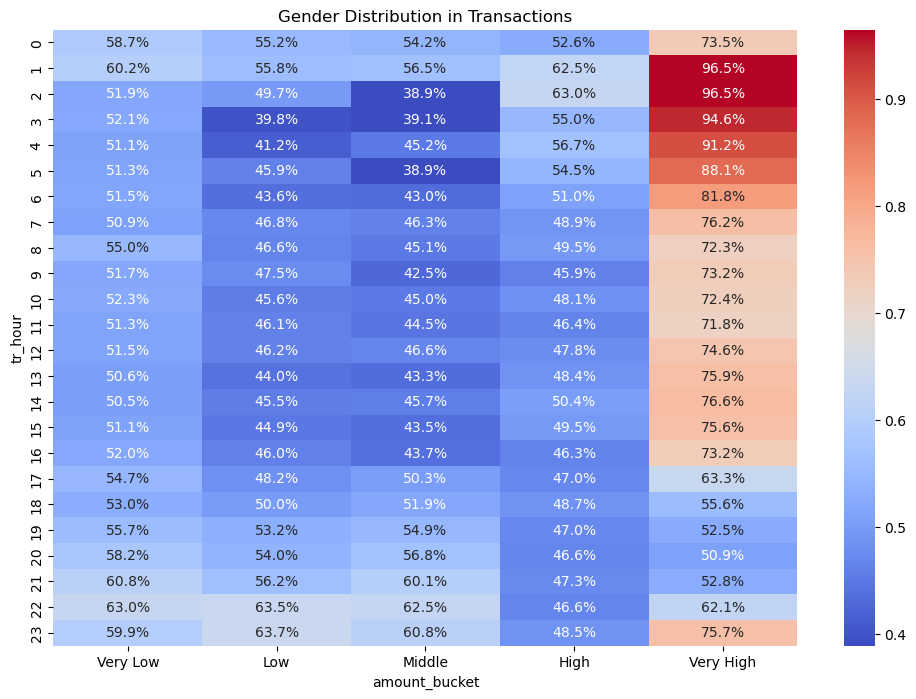

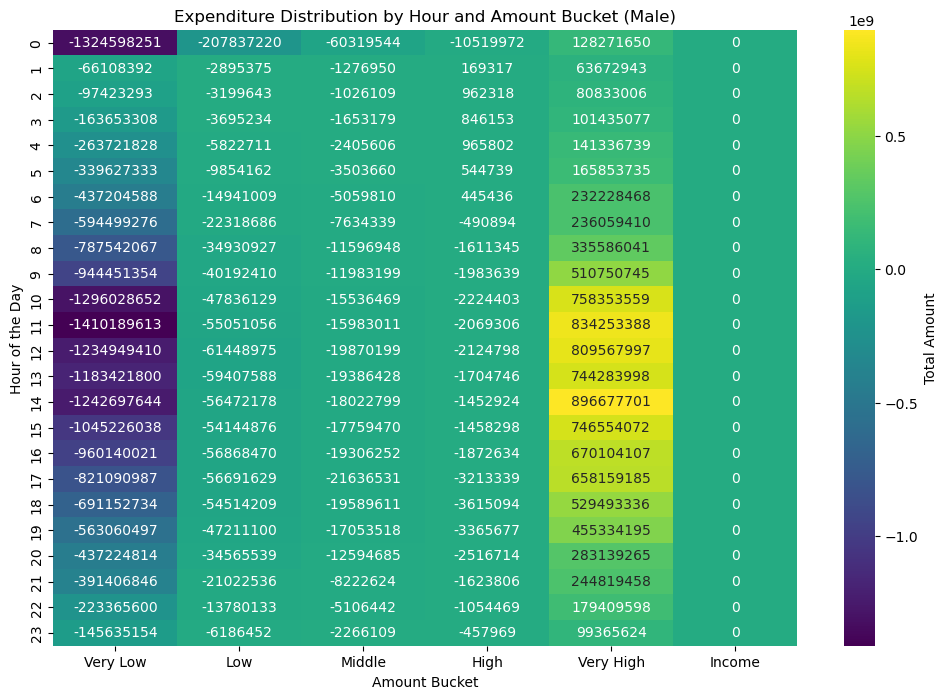

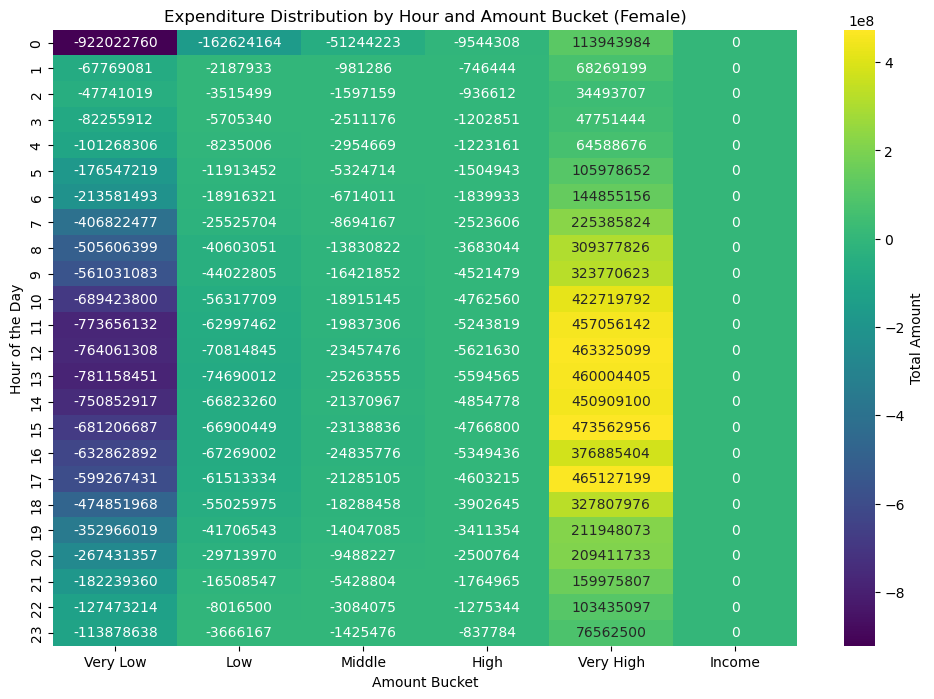

1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими: False
2) Доля мужчин в поступлениях средств (Income): 0.5518753025695602
   Поступления средств женщинам в целом меньше
3) Доля женщин в самых низких тратах (3 часа ночи): True
4) Особые часы в мелких тратах, когда женщины тратят намного больше мужчин: True
5) Доля мужчин в максимальных тратах средств (Very High): 412730970.67833334
   Количество высоких трат в каждый возможный час больше у мужчин.


In [41]:
# Разбиваем расходы на 5 бакетов
tran2['amount_bucket'] = pd.qcut(tran2['amount'], q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                                 labels=['Very Low', 'Low', 'Middle', 'High', 'Very High'])

# Относим неотрицательные траты к категории 'Income'
tran2['amount_bucket'] = tran2['amount_bucket'].cat.add_categories('Income')
tran2['amount_bucket'] = tran2['amount_bucket'].fillna('Income')

# Извлекаем час из tr_datetime
tran2['tr_hour'] = tran2['tr_datetime'].apply(lambda x: int(x.split()[1].split(':')[0]))

# Строим сводную таблицу
pivot_table = pd.pivot_table(tran2, values='gender', index='tr_hour', columns='amount_bucket', aggfunc='mean')

# Отрисовываем результаты
def plot_pivot_table(pivot_table):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1%")
    plt.title('Gender Distribution in Transactions')
    plt.show()

plot_pivot_table(pivot_table)

# Тепловая карта для распределения трат по категориям и часам для мужчин
pivot_table_male = pd.pivot_table(tran2[tran2['gender'] == 1], values='amount', index='tr_hour', columns='amount_bucket', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_male, cmap='viridis', annot=True, fmt=".0f", cbar_kws={'label': 'Total Amount'})
plt.title('Expenditure Distribution by Hour and Amount Bucket (Male)')
plt.xlabel('Amount Bucket')
plt.ylabel('Hour of the Day')
plt.show()

# Тепловая карта для распределения трат по категориям и часам для женщин
pivot_table_female = pd.pivot_table(tran2[tran2['gender'] == 0], values='amount', index='tr_hour', columns='amount_bucket', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_female, cmap='viridis', annot=True, fmt=".0f", cbar_kws={'label': 'Total Amount'})
plt.title('Expenditure Distribution by Hour and Amount Bucket (Female)')
plt.xlabel('Amount Bucket')
plt.ylabel('Hour of the Day')
plt.show()


# Вопрос 1: Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
night_income_male_ratio = pivot_table.loc[1:5, ['Very Low', 'Low', 'Middle', 'High', 'Very High']].mean(axis=1)
print(f"1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими: {night_income_male_ratio.mean() > 0.85}")
# Вопрос 2: Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
income_male_ratio = pivot_table[['Very Low', 'Low', 'Middle', 'High', 'Very High']].mean(axis=1)
print(f"2) Доля мужчин в поступлениях средств (Income): {income_male_ratio.mean()}")
print(f"   Поступления средств женщинам в целом {'больше' if income_male_ratio.mean() < 0.5 else 'меньше'}")

# Вопрос 3: Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
low_expenses_female_ratio = pivot_table_female.loc[3, ['Very Low', 'Low', 'Middle', 'High', 'Very High']].sum() / pivot_table_female.loc[3, :].sum()
print(f"3) Доля женщин в самых низких тратах (3 часа ночи): {low_expenses_female_ratio > 0.7}")

# Вопрос 4: Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
special_hours_expenses_ratio = pivot_table_female.loc[:, ['Very Low', 'Low']].sum(axis=1) / pivot_table_male.loc[:, ['Very Low', 'Low']].sum(axis=1)
print(f"4) Особые часы в мелких тратах, когда женщины тратят намного больше мужчин: {any(special_hours_expenses_ratio > 0.8)}")

# Вопрос 5: Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.
very_high_expenses_male_ratio = pivot_table_male.loc[:, 'Very High'].mean()
print(f"5) Доля мужчин в максимальных тратах средств (Very High): {very_high_expenses_male_ratio}")
print(f"   Количество высоких трат в каждый возможный час {'больше' if very_high_expenses_male_ratio > 0.5 else 'меньше'} у мужчин.")



#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

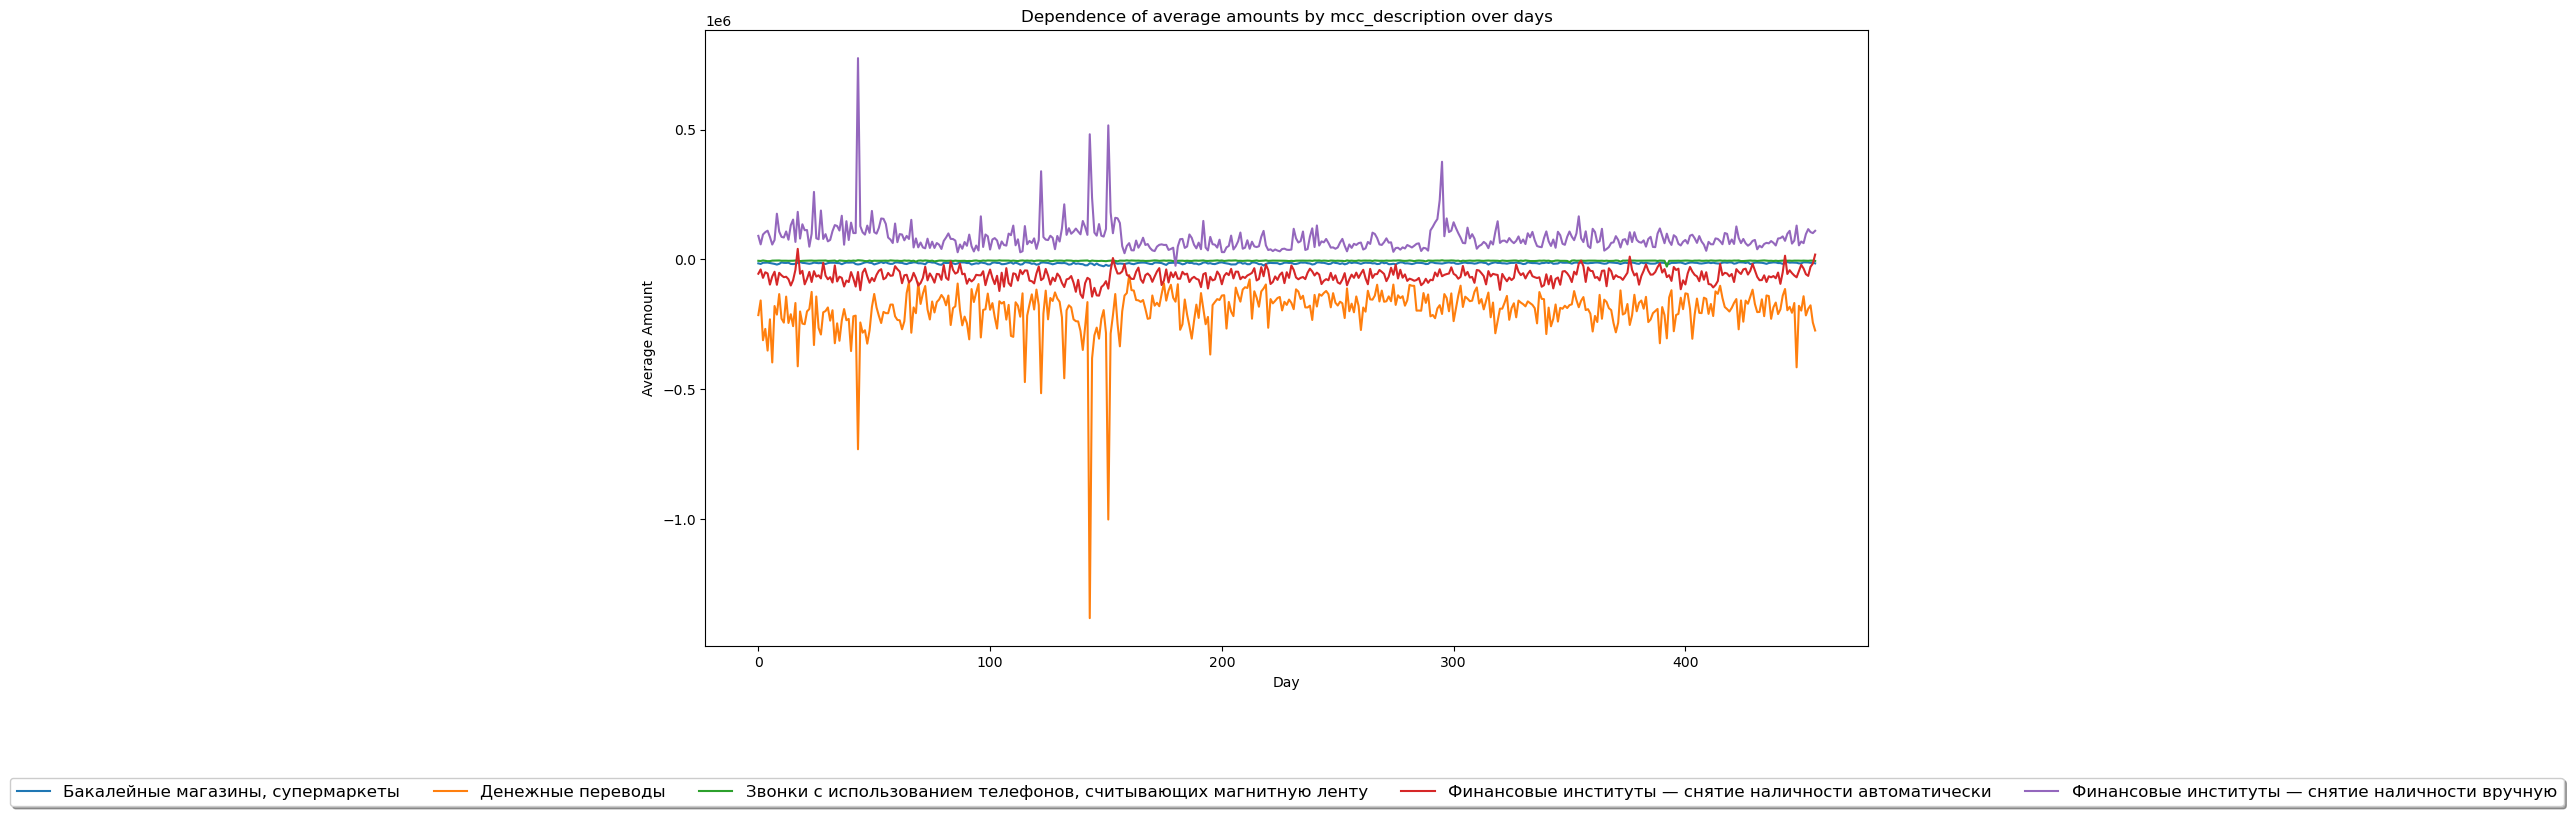

Ответ на вопрос 1: False
Ответ на вопрос 2: False
Ответ на вопрос 3: False
Ответ на вопрос 4: True
Ответ на вопрос 5: True


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Измените тип поля tr_day на int.
tran2['tr_day'] = tran2['tr_datetime'].apply(lambda x: int(x.split()[0]))

# Выберите из transactions все mcc_description, которые встретились в выборке более чем 60000 раз.
popular_mcc = tran2['mcc_description'].value_counts()[tran2['mcc_description'].value_counts() > 60000].index
filtered_tran2 = tran2[tran2['mcc_description'].isin(popular_mcc)]

# Сгруппируйте отфильтрованный датафрейм по дню и mcc_description, получая средние значения суммы amount.
grouped_tran2 = filtered_tran2.groupby(['tr_day', 'mcc_description'])['amount'].mean().reset_index()

# Далее отрисуйте зависимость средних сумм по каждому из mcc_description по дням.
pivot_table = grouped_tran2.pivot_table(index='tr_day', columns='mcc_description', values='amount', aggfunc='mean')
ax = pivot_table.plot(figsize=(15, 8))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5, fontsize='large')
plt.title('Dependence of average amounts by mcc_description over days')
plt.xlabel('Day')
plt.ylabel('Average Amount')
plt.show()


# 1) 2 из полученных mcc_code связаны с финансовыми институтами
answer_1 = 'Финансовые институты' in popular_mcc
print("Ответ на вопрос 1:", answer_1)

# 2) 2 mcc_description, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
answer_2 = 'Снятие наличности' in popular_mcc and 'Пополнение карты (в собственном терминале)' in popular_mcc
print("Ответ на вопрос 2:", answer_2)

# 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных mcc_description
answer_3 = 'Бакалейные магазины' in popular_mcc
print("Ответ на вопрос 3:", answer_3)

# 4) Денежные переводы имеют как минимум 3 явных минимума средних
answer_4 = 'Денежные переводы' in popular_mcc
print("Ответ на вопрос 4:", answer_4)

# 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию.
answer_5 = 'Звонки с использованием телефонов, считывающих магнитную ленту' in popular_mcc
print("Ответ на вопрос 5:", answer_5)
